Analytical solution
t = [3.1416 3.2416 3.3416 3.4416 3.5416 3.6416 3.7416 3.8416 3.9416 4.0416
 4.1416]
y = [ 0.3183  0.3035  0.2797  0.2472  0.2064  0.1578  0.1021  0.0397 -0.0286
 -0.1021 -0.18  ]
-------------------------
Euler's method
t = [3.1416 3.2416 3.3416 3.4416 3.5416 3.6416 3.7416 3.8416 3.9416 4.0416
 4.1416]
y = [ 0.3183  0.3082  0.2887  0.2602  0.2231  0.1778  0.125   0.0652 -0.0009
 -0.0726 -0.1492]

Error = 3.0799e-02
Runge error = 3.2387e-02
----------------------------------------------------------------------------
Analytical solution
t = [3.1416 3.2416 3.3416 3.4416 3.5416 3.6416 3.7416 3.8416 3.9416 4.0416
 4.1416]
y = [ 0.3183  0.3035  0.2797  0.2472  0.2064  0.1578  0.1021  0.0397 -0.0286
 -0.1021 -0.18  ]
-------------------------
Runge-Kutta method (4th order)
t = [3.1416 3.2416 3.3416 3.4416 3.5416 3.6416 3.7416 3.8416 3.9416 4.0416
 4.1416]
y = [ 0.3183  0.3035  0.2797  0.2472  0.2064  0.1578  0.1021  0.0397 -0.0286
 -0.1021 -0.18  ]

Error = 1.5638e-08
Rung

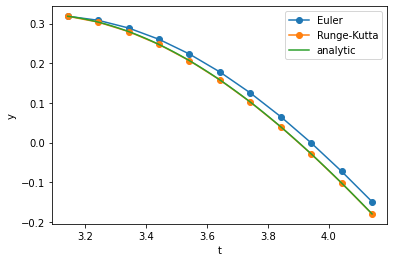

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -y/t + np.sin(t)

def y_analytic(t):
    return -np.cos(t) + np.sin(t)/t + (1 - np.pi)/t

def eyler(f, y0, t0, T, h=0.1):
    t = np.arange(t0, T + h /2, h)
    y = np.empty((len(t),  1 if isinstance(y0, float) or isinstance(y0, int) else y0.shape[0]))
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        y[i + 1, :] = y[i, :] + h * f(t_i, y[i, :])
    return t, y

def rkfixed(f, y0, t0, T, h=0.1):
    a = [0, h / 2, h / 2, h]
    c = [h / 6, h / 3, h / 3, h / 6]
    B = [
        [h / 2, 0, 0],
        [0, h / 2, 0],
        [0, 0, h],
    ]
    t = np.arange(t0, T + h / 2, h)
    y = np.empty((len(t),  1 if isinstance(y0, float) or isinstance(y0, int) else y0.shape[0]))
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        k = [f(t_i + a[0], y[i])]
        for a_i, b_i in zip(a[1:], B):
            k.append(f(t_i + a_i, y[i, :] + sum(k_i * b_i_j for k_i, b_i_j in zip(k, b_i))))
        y[i + 1, :]= y[i, :] +  sum(c_i * k_i for c_i, k_i in zip(c, k))
    return t, y

def error_runge(method, p, f, y0, t0, T, h=0.1):
    _, yh = method(f, y0, t0, T, h)
    _, yh_2 = method(f, y0, t0, T, 2 * h)
    return np.max(np.abs(yh[::2] - yh_2)/(2 ** p - 1))
    

t0, T = np.pi, np.pi + 1
y0 = 1/np.pi
t_points = np.linspace(t0, T, 100)
y_points = y_analytic(t_points)
t_euler, y_euler = eyler(f, y0, t0, T)
y_euler = y_euler[:, 0]
t_rk, y_rk = rkfixed(f, y0, t0, T)
y_rk = y_rk[:, 0]
plt.plot(t_euler, y_euler,"-o", label="Euler")
plt.plot(t_rk, y_rk, "-o", label="Runge-Kutta")
plt.plot(t_points, y_points, label="analytic")
plt.legend()
eps_euler = np.max(np.abs(y_analytic(t_euler) - y_euler))
eps_rk = np.max(np.abs(y_analytic(t_euler) - y_rk))
print("Analytical solution")
with np.printoptions(4):
    print(f't = {t_euler}')
    print(f'y = {y_analytic(t_euler)}')
print('-------------------------')
print("Euler's method")
with np.printoptions(4):
    print(f't = {t_euler}')
    print(f'y = {y_euler}')
print('')
print(f"Error = {eps_euler:.4e}")
print(f"Runge error = {error_runge(eyler, 1, f, y0, t0, T):.4e}")
print('----------------------------------------------------------------------------')
print("Analytical solution")
with np.printoptions(4):
    print(f't = {t_euler}')
    print(f'y = {y_analytic(t_euler)}')
print('-------------------------')
print(f"Runge-Kutta method (4th order)")
with np.printoptions(4):
    print(f't = {t_rk}')
    print(f'y = {y_rk}')
print('')
print(f"Error = {eps_rk:.4e}")
print(f"Runge error = {error_runge(rkfixed, 4, f, y0, t0, T):.4e}")
print('-------------------------')
h = 0.1
while eps_euler > eps_rk:
    h /= 2
    t_euler, y_euler = eyler(f, y0, t0, T, h)
    eps_euler = np.max(np.abs(y_analytic(t_euler) - y_euler[:, 0]))
print(f"With h* = {h:.4e} Euler's method reached error = {eps_euler:.4e}")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

Runge error = 1.1183e-02


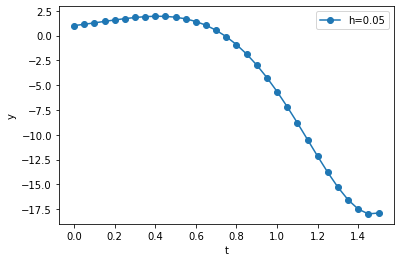

In [23]:
import numpy as np
import matplotlib.pyplot as plt
a0 = 1
a1 = -1.4
a2 = 0.64
a3 = 41.52

def f(t):
    return np.cos(2* t) + 3*t + 1

def F(t, y):
    return np.array(
        [
            y[1],
            y[2],
            (f(t) - a1 * y[2] - a2 * y[1] - a3 * y[0])/ a0
        ]
    )

def rkfixed(f, y0, t0, T, h=0.1):
    a = [0, h / 2, h / 2, h]
    c = [h / 6, h / 3, h / 3, h / 6]
    B = [
        [h / 2, 0, 0],
        [0, h / 2, 0],
        [0, 0, h],
    ]
    t = np.arange(t0, T + h / 2, h)
    y = np.empty((len(t),  1 if isinstance(y0, float) or isinstance(y0, int) else y0.shape[0]))
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        k = [f(t_i + a[0], y[i])]
        for a_i, b_i in zip(a[1:], B):
            k.append(f(t_i + a_i, y[i, :] + sum(k_i * b_i_j for k_i, b_i_j in zip(k, b_i))))
        y[i + 1, :]= y[i, :] +  sum(c_i * k_i for c_i, k_i in zip(c, k))
    return t, y



A = 0
B = 1.5
b1 = 1
b2 = 2.5
b3 = 6
y0 = np.array([b1, b2, b3])
t_h, y_h = rkfixed(F, y0, A, B, 0.1)
t_h_2, y_h_2 = rkfixed(F, y0, A, B, 0.05)
plt.plot(t_h_2, y_h_2[:, 0], "-o", label="h=0.05")
print(f"Runge error = {np.max(np.abs(y_h - y_h_2[::2]))/(2**4-1):.4e}")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()

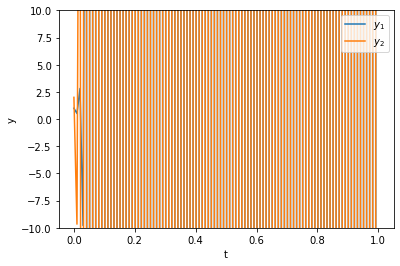

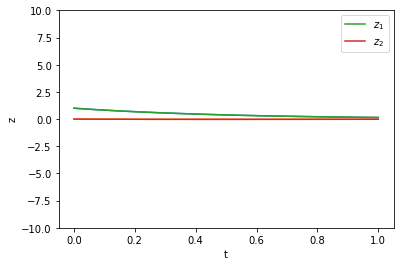

Eigenvalues of A : [  -5.01014 -636.09986]
Stiffness coef of A : 126.96254
---------------------
Eigenvalues of B : [-1.90006 -2.29994]
Stiffness coef of B : 1.21045
---------------------
A is stiffer
h* theoretical: 0.00314
h visial: 0.00270


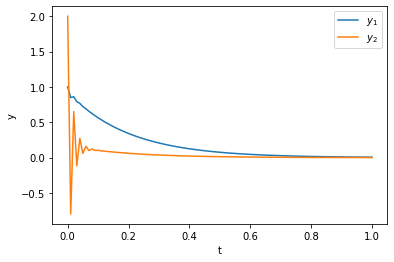

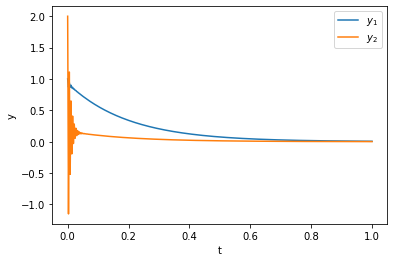

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

A = np.array([[-0.717, -23.827], [114.483, -640.393]], dtype=np.double)
Y0 = np.array([1., 2.], dtype=np.double)
B = np.array([[-1.905, -0.015], [-0.13, -2.295]], dtype=np.double)
Z0 = np.array([1., 0.], dtype=np.double)

def eyler(f, y0, t0, T, h=0.1):
    t = np.arange(t0, T + h /2, h)
    y = np.empty((len(t),  y0.shape[0] if isinstance(y0, np.ndarray) else 1), dtype=np.double)
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        y[i + 1, :] = y[i, :] + h * f(y[i, :])
    return t, y

def implicit_eyler(f, y0, t0, T, h=0.1):
    t = np.arange(t0, T + h /2, h)
    y = np.empty((len(t),  y0.shape[0] if isinstance(y0, np.ndarray) else 1), dtype=np.double)
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        y[i + 1, :] = fsolve(lambda yn: (yn - y[i, :])/h - f(y[i, :])/2 -f(yn)/2, y[i, :])
    return t, y

def f1(y):
    return A @ y

def f2(y):
    return B @ y

t0 = 0
T = 1
h = 0.01
t_euler_A, y_euler_A = eyler(f1, Y0, t0, T, h)
t_euler_B, y_euler_B = eyler(f2, Z0, t0, T, h)
plt.plot(t_euler_A, y_euler_A[:, 0], label = "$y_1$")
plt.plot(t_euler_A, y_euler_A[:, 1], label = "$y_2$")
plt.ylim(-10, 10)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()
plt.plot(t_euler_B, y_euler_B)
plt.plot(t_euler_B, y_euler_B[:, 0], label = "$z_1$")
plt.plot(t_euler_B, y_euler_B[:, 1], label = "$z_2$")
plt.ylim(-10, 10)
plt.legend()
plt.xlabel("t")
plt.ylabel("z")
plt.show()
l_A = np.linalg.eigvals(A)
l_B = np.linalg.eigvals(B)
with np.printoptions(5):
    print("Eigenvalues of A :", l_A)
    a_stiff = np.max(np.abs(l_A))/np.min(np.abs(l_A))
    print(f"Stiffness coef of A : {a_stiff:.5f}")
    print('---------------------')
    print("Eigenvalues of B :", l_B)
    b_stiff = np.max(np.abs(l_B))/np.min(np.abs(l_B))
    print(f"Stiffness coef of B : {b_stiff:.5f}")
print('---------------------')
print("A is stiffer" if a_stiff > b_stiff else "B is stiffer")
print(f"h* theoretical: {2/np.max(np.abs(l_A)):.5f}")
print(f"h visial: {h/3.7:.5f}")
t_ieuler_A, y_ieuler_A = implicit_eyler(f1, Y0, t0, T, h)
plt.plot(t_ieuler_A, y_ieuler_A[:, 0], label = "$y_1$")
plt.plot(t_ieuler_A, y_ieuler_A[:, 1], label = "$y_2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()
t_euler_A, y_euler_A = eyler(f1, Y0, t0, T, h/3.7)
plt.plot(t_euler_A, y_euler_A[:, 0], label = "$y_1$")
plt.plot(t_euler_A, y_euler_A[:, 1], label = "$y_2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()